In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

In [3]:
from src.tabulka import tabulka
from src.graf import graf

## Zformátování pro hezké výpisy

In [4]:
df['track_hezky'] = df.apply(lambda row: f"""{row['interpret_hlavni']}: {row['track'].split("(")[0]}""", axis=1)

In [5]:
df

,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,track_hezky
0,CZ - RADIO - TOP 100,2006,1,2006-01,1,Hung Up,Madonna,Madonna,Warner Music,Madonna: Hung Up
1,CZ - RADIO - TOP 100,2006,1,2006-01,2,La camisa negra,Juanes,Juanes,Universal Music,Juanes: La camisa negra
2,CZ - RADIO - TOP 100,2006,1,2006-01,3,Push The Button,Sugababes,Sugababes,Universal Music,Sugababes: Push The Button
3,CZ - RADIO - TOP 100,2006,1,2006-01,4,Tripping,Robbie Williams,Robbie Williams,Warner Music,Robbie Williams: Tripping
4,CZ - RADIO - TOP 100,2006,1,2006-01,5,Hotel California,Victoria,Victoria,Universal Music,Victoria: Hotel California
...,...,...,...,...,...,...,...,...,...,...
90995,CZ - RADIO - TOP 100,2023,43,2023-43,96,Friend For Life,X Ambassadors & Medium Build,X Ambassadors,Nan,X Ambassadors: Friend For Life
90996,CZ - RADIO - TOP 100,2023,43,2023-43,97,SNAP,Rosa Linn,Rosa Linn,Sony Music,Rosa Linn: SNAP
90997,CZ - RADIO - TOP 100,2023,43,2023-43,98,Without You,Tribbs,Tribbs,Nan,Tribbs: Without You
90998,CZ - RADIO - TOP 100,2023,43,2023-43,99,Meltdown,Niall Horan,Niall Horan,Universal Music,Niall Horan: Meltdown


## Písně, které se točí v hodně letech, ale málo konkrétních týdnech

In [6]:
letnipisne = df[df['tyden'].isin([x for x in range(13,42)])]['track'].drop_duplicates().to_list()

In [7]:
vanocnipisne = df[(df['tyden'].isin([49,50,51,52,53]) & (~df['track'].isin(letnipisne)))].groupby(['track'])['rok'].nunique().nlargest(50)
vanocnipisne = vanocnipisne[vanocnipisne >= 2]
vanocnipisne

track
All I Want For Christmas Is You    11
Christmas Is All Around            11
Last Christmas                     11
Půlnoční                           11
Happy Xmas (War Is Over)           10
Sliby se maj plnit o Vánocích      10
Thank God It´s Christmas           10
Medvídek                            9
Na nebi svítí                       7
Do They Know It´s Christmas?        6
Sněhulák                            6
Vánoce na míru                      6
Christmas Lights                    4
Vánoční                             4
Jsou svátky                         3
Ledaco                              3
Ryba rybě                           3
Biela krása                         2
Bílý kraj                           2
Christmas Without You               2
Lover                               2
Merry Christmas                     2
Milióóóny přání                     2
Shake Up Christmas                  2
Tichá noc                           2
Tiché Gloria                        2
Vianoč

In [8]:
len(vanocnipisne)

29

In [9]:
vanocnitracky = vanocnipisne.index.to_list()

In [10]:
vanocnipisne_hezky = df[(df['tyden'].isin([49,50,51,52,53]) & (~df['track'].isin(letnipisne)))].groupby(['track_hezky'])['rok'].nunique().nlargest(50)
vanocnipisne_hezky = vanocnipisne_hezky[vanocnipisne_hezky >= 6]
vanocnipisne_hezky = pd.DataFrame(vanocnipisne_hezky).reset_index().rename(columns={'track_hezky':'Píseň','rok':'Let v hitparádě'})
vanocnipisne_hezky

,Píseň,Let v hitparádě
0,Billy Mack: Christmas Is All Around,11
1,Mariah Carey: All I Want For Christmas Is You,11
2,Václav Neckář: Půlnoční,11
3,Wham!: Last Christmas,11
4,Janek Ledecký: Sliby se maj plnit o Vánocích,10
5,John Lennon: Happy Xmas,10
6,Queen: Thank God It´s Christmas,10
7,Lucie: Medvídek,9
8,Dan Bárta: Na nebi svítí,7
9,Band Aid Ii.: Do They Know It´s Christmas?,6


In [11]:
tabulka(vanocnipisne_hezky, titulek="Vánoční hitparádové stálice", podtitulek="Data od roku 2006, zdroj: ČNS IFPI")

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Vánoční hitparádové stálice</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Píseň</th><th class="text-nowrap">Let v hitparádě</th></tr></thead><tbody class="text-sm"><tr><td>Billy Mack: Christmas Is All Around</td><td>11</td></tr><tr><td>Mariah Carey: All I Want For Christmas Is You</td><td>11</td></tr><tr><td>Václav Neckář: Půlnoční</td><td>11</td></tr><tr><td>Wham!: Last Christmas</td><td>11</td></tr><tr><td>Janek Ledecký: Sliby se maj plnit o Vánocích</td><td>10</td></tr><tr><td>John Lennon: Happy Xmas</td><td>10</td></tr><tr><td>Queen: Thank God It´s Christmas</td><td>10</td></tr><tr><td>Lucie: Medvídek</td><td>9</td></tr><tr><td>Dan Bárta: Na nebi svítí</td><td>7</td></tr><tr><td>Band Aid Ii.: Do They Know It´s Christmas?</td><td>6</td></tr><tr><td>Ewa Farna: Vánoce na míru</td><td>6</td></tr><tr><td>Michal Hrůza: Sněhulák</td><td>6</td></tr></tbody><tfoot

## Písně, které mají Vánoce v názvu

In [12]:
df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates()

30598    Sliby se maj plnit o Vánocích
35665                      Vánoce bílý
56090             Vánoce hrajou glóriá
60989                   Vánoce na míru
81392                 Vánoce jako dřív
86394    O Vánocích (feat. Boni Pueri)
86595                Vánoce přicházejí
Name: track, dtype: object

In [13]:
df[df['track'].str.contains('Xmas')]['track'].drop_duplicates()

35676    Happy Xmas (War Is Over)
Name: track, dtype: object

In [14]:
df[df['track'].str.contains('Christm')]['track'].drop_duplicates()

10298                     Last Christmas
25250                 Shake Up Christmas
25475                   Christmas Lights
30377            Christmas Is All Around
30580    All I Want For Christmas Is You
35693           Thank God It´s Christmas
40778                    White Christmas
45638       Do They Know It´s Christmas?
50996           Merry Christmas Everyone
76351              Christmas Without You
81461                    Merry Christmas
Name: track, dtype: object

In [15]:
vanocevnazvu = df[df['track'].str.contains('Christm')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Xmas')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates().to_list() + df[df['track'].str.lower().str.contains('vánoč')]['track'].drop_duplicates().to_list()

In [16]:
vanocni = vanocevnazvu + vanocnitracky

In [17]:
vanocni

['Last Christmas',
 'Shake Up Christmas',
 'Christmas Lights',
 'Christmas Is All Around',
 'All I Want For Christmas Is You',
 'Thank God It´s Christmas',
 'White Christmas',
 'Do They Know It´s Christmas?',
 'Merry Christmas Everyone',
 'Christmas Without You',
 'Merry Christmas',
 'Happy Xmas (War Is Over)',
 'Sliby se maj plnit o Vánocích',
 'Vánoce bílý',
 'Vánoce hrajou glóriá',
 'Vánoce na míru',
 'Vánoce jako dřív',
 'O Vánocích (feat. Boni Pueri)',
 'Vánoce přicházejí',
 'Vánoční svařák',
 'Vánoční strom',
 'Vánoční přání',
 'Vánoční hymna',
 'Čas vánoční',
 'Vánoční fanatik',
 'Vánoční',
 'All I Want For Christmas Is You',
 'Christmas Is All Around',
 'Last Christmas',
 'Půlnoční',
 'Happy Xmas (War Is Over)',
 'Sliby se maj plnit o Vánocích',
 'Thank God It´s Christmas',
 'Medvídek',
 'Na nebi svítí',
 'Do They Know It´s Christmas?',
 'Sněhulák',
 'Vánoce na míru',
 'Christmas Lights',
 'Vánoční',
 'Jsou svátky',
 'Ledaco',
 'Ryba rybě',
 'Biela krása',
 'Bílý kraj',
 'Chris

## Kdy se to dostává do top 100

<Axes: xlabel='tyden'>

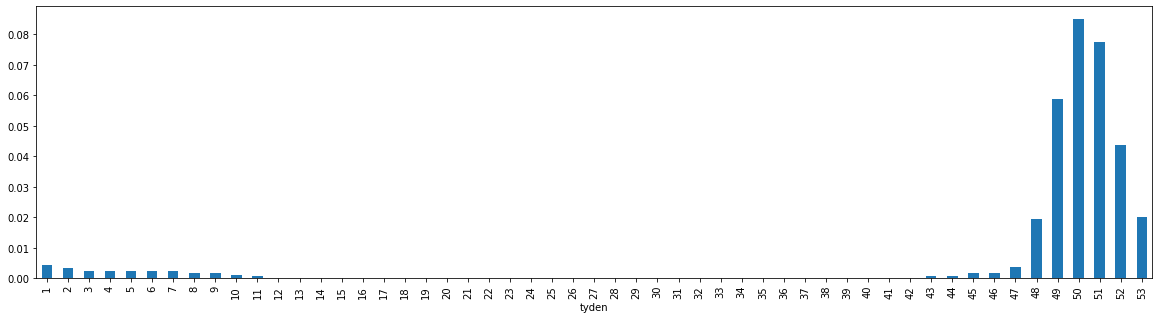

In [84]:
(df[df['track'].isin(vanocni)].groupby("tyden").size() / df.groupby('tyden').size()).plot.bar(figsize=(20,5))

In [19]:
vanocni_tydnove = [43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9,10,11]

In [20]:
cely_rok = pd.Series((df[df['track'].isin(vanocni)].groupby("tyden").size()).reindex(vanocni_tydnove), name='Hitparádové příčky obsazené od roku 2006 vánočními písněmi')

In [21]:
cely_rok

tyden
43      1
44      1
45      3
46      3
47      6
48     33
49    100
50    136
51     62
52     57
1       8
2       6
3       4
4       4
5       4
6       4
7       4
8       3
9       3
10      2
11      1
Name: Hitparádové příčky obsazené od roku 2006 vánočními písněmi, dtype: int64

In [22]:
df[df['track'].isin(vanocni) & (df['tyden'] == 8)]

,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,track_hezky
36579,CZ - RADIO - TOP 100,2013,8,2013-08,80,Biela krása,No Name,No Name,Sony Music,No Name: Biela krása
46661,CZ - RADIO - TOP 100,2015,8,2015-08,62,Sněhulák,Michal Hrůza,Michal Hrůza,Universal Music,Michal Hrůza: Sněhulák
72195,CZ - RADIO - TOP 100,2020,8,2020-08,96,Lover,Taylor Swift,Taylor Swift,Universal Music,Taylor Swift: Lover


In [23]:
graf(sloupcovy=[cely_rok], target="vanoce_celorok", titulek='Ve kterých týdnech se vánoční hity dostávají do top 100', podtitulek=f'''Do března v hitparádě vydržely Biela krása od No Name (2013), Sněhulák od Michala Hrůzy (2015) a Lover od Taylor Swift (2020).''', kredity=["Zdroj dat: ČNS IFPI | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=False, osay=' ', osay2=' ', skladany=False, naopak=False, skrytnuly=True)

Graf uložen.


## Trajektorie písní

In [24]:
vsechnytydny = df['week'].drop_duplicates().to_list()

In [25]:
vsechnytydny[294:-39]

['2011-40',
 '2011-41',
 '2011-42',
 '2011-43',
 '2011-44',
 '2011-45',
 '2011-46',
 '2011-47',
 '2011-48',
 '2011-49',
 '2011-50',
 '2011-52',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2012-13',
 '2012-14',
 '2012-15',
 '2012-16',
 '2012-17',
 '2012-18',
 '2012-19',
 '2012-20',
 '2012-21',
 '2012-22',
 '2012-23',
 '2012-24',
 '2012-25',
 '2012-26',
 '2012-27',
 '2012-28',
 '2012-29',
 '2012-30',
 '2012-31',
 '2012-32',
 '2012-33',
 '2012-34',
 '2012-35',
 '2012-36',
 '2012-37',
 '2012-38',
 '2012-39',
 '2012-40',
 '2012-41',
 '2012-42',
 '2012-43',
 '2012-44',
 '2012-45',
 '2012-46',
 '2012-47',
 '2012-48',
 '2012-49',
 '2012-50',
 '2012-51',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2013-13',
 '2013-14',
 '2013-15',
 '2013-16',
 '2013-17',
 '2013-18',
 '2013-19',
 '2013-20',
 '20

In [26]:
def trajektorie(pisnicka):
    pracovni = df.copy()
    pracovni = pracovni[(pracovni['track_hezky'] == pisnicka)].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny[292:-39], fill_value=101).sort_index()
    return pd.Series(pracovni['pozice'], name=pisnicka)

In [27]:
trajekts = []
for p in vanocnipisne_hezky['Píseň'].drop_duplicates().to_list():
    trajekts.append(trajektorie(p))
len(trajekts)

12

In [28]:
graf(carovy=trajekts, target="vanoce_since_2006", titulek='Dobré koledy se vracejí', podtitulek=f'''Hitparádová umístění 12 nejtrvanlivějších vánočních písní''', kredity=["Zdroj dat: ČNS IFPI | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, skrytnuly=True, vzhurunohama=True, osaymin=1, osaymax=100)

Graf uložen.


In [29]:
df[(df['rok'] == 2017) & (df['tyden'] == 49)]

,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,track_hezky
61000,CZ - RADIO - TOP 100,2017,49,2017-49,1,Words,Emma Drobná,Emma Drobná,Warner Music,Emma Drobná: Words
61001,CZ - RADIO - TOP 100,2017,49,2017-49,2,Walk On Water,Thirty Seconds To Mars,Thirty Seconds To Mars,Universal Music,Thirty Seconds To Mars: Walk On Water
61002,CZ - RADIO - TOP 100,2017,49,2017-49,3,Little Hollywood,Alle Farben & Janieck,Alle Farben,Sony Music,Alle Farben: Little Hollywood
61003,CZ - RADIO - TOP 100,2017,49,2017-49,4,Whatever It Takes,Imagine Dragons,Imagine Dragons,Universal Music,Imagine Dragons: Whatever It Takes
61004,CZ - RADIO - TOP 100,2017,49,2017-49,5,More Than You Know,Axwell / Ingrosso,Axwell,Universal Music,Axwell: More Than You Know
...,...,...,...,...,...,...,...,...,...,...
61095,CZ - RADIO - TOP 100,2017,49,2017-49,96,You’re The Best Thing About Me,U2,U2,Universal Music,U2: You’re The Best Thing About Me
61096,CZ - RADIO - TOP 100,2017,49,2017-49,97,I Feel So Bad,Kungs & Ephemerals,Kungs,Universal Music,Kungs: I Feel So Bad
61097,CZ - RADIO - TOP 100,2017,49,2017-49,98,Beautiful Ones,Hurts,Hurts,Sony Music,Hurts: Beautiful Ones
61098,CZ - RADIO - TOP 100,2017,49,2017-49,99,New Rules,Dua Lipa,Dua Lipa,Warner Music,Dua Lipa: New Rules


In [30]:
def cesta_pisne(seznam):
    pracovni = df.copy()
    pracovni = pracovni[(pracovni['track'].isin(seznam))].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni['pozice'].plot(figsize=(20,5)).invert_yaxis()

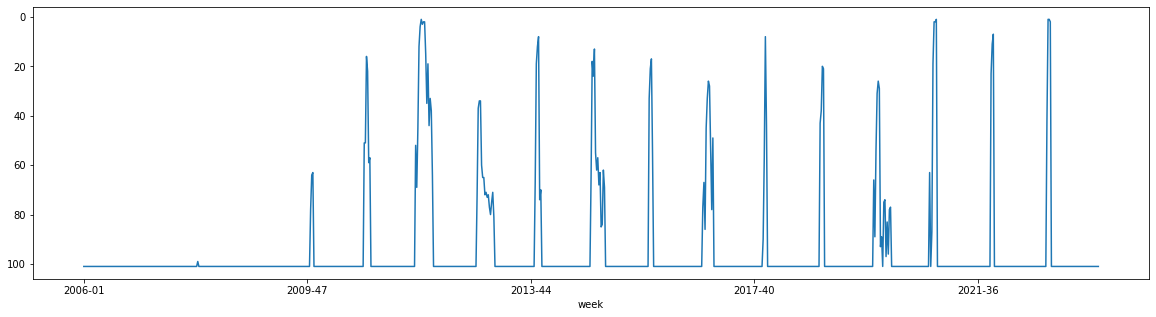

In [31]:
cesta_pisne(vanocni)

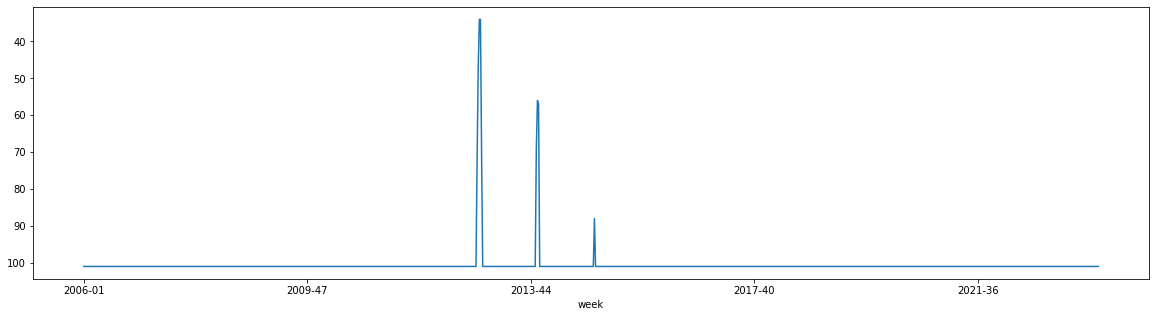

In [32]:
cesta_pisne(['Ledaco'])

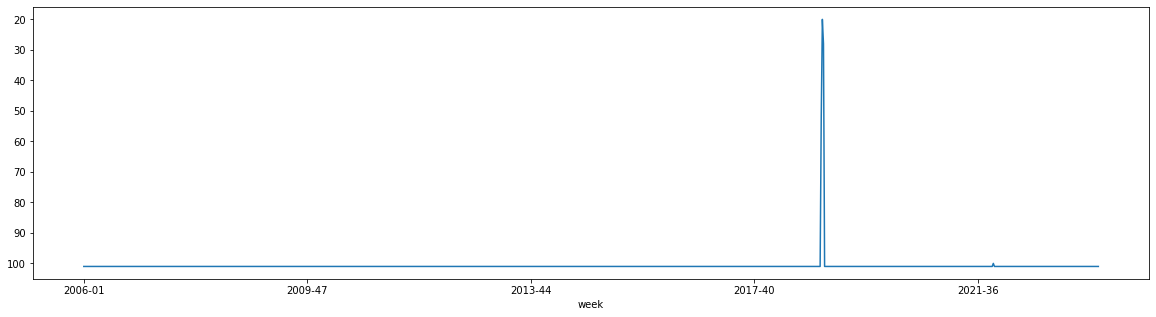

In [33]:
cesta_pisne(['Milióóóny přání'])

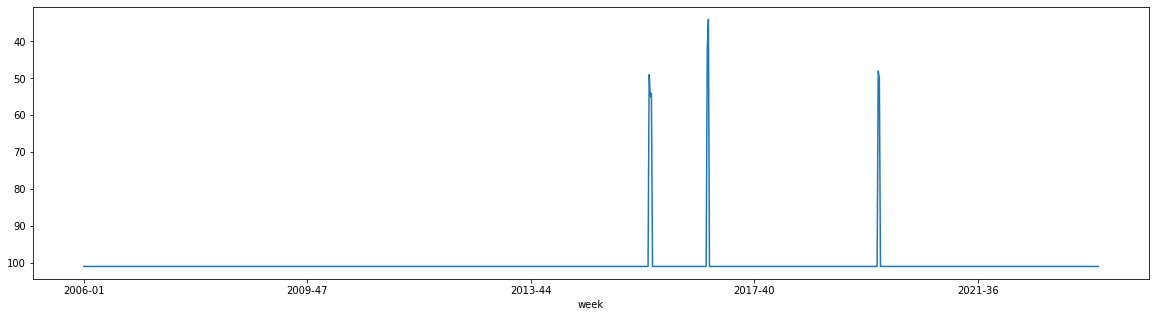

In [34]:
cesta_pisne(['Jsou svátky'])

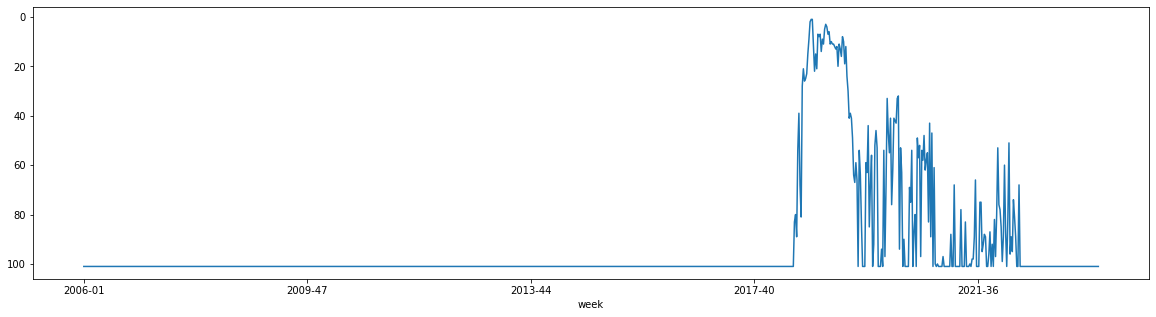

In [35]:
cesta_pisne(['Chci tančit'])

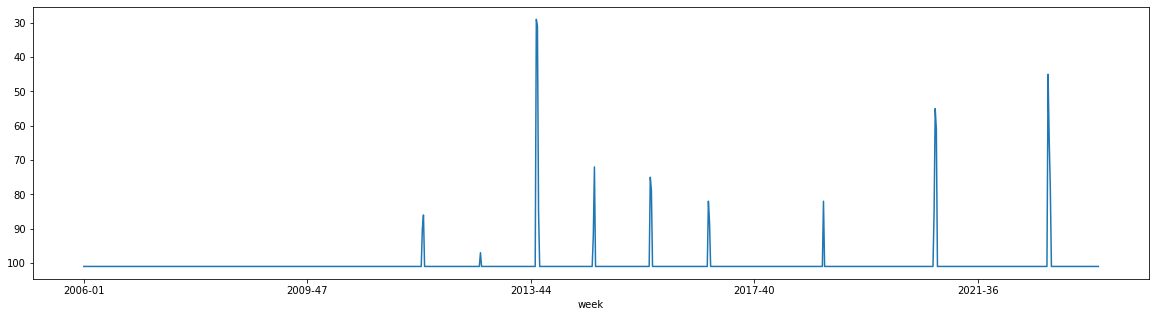

In [36]:
cesta_pisne(['Medvídek'])

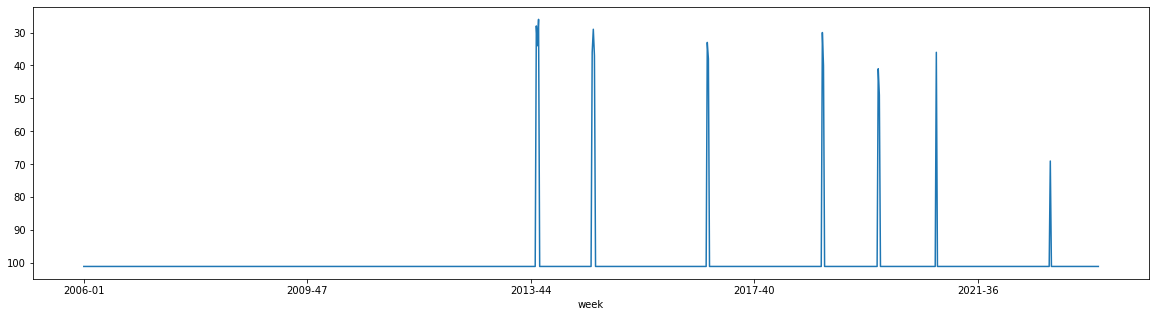

In [37]:
cesta_pisne(['Na nebi svítí'])

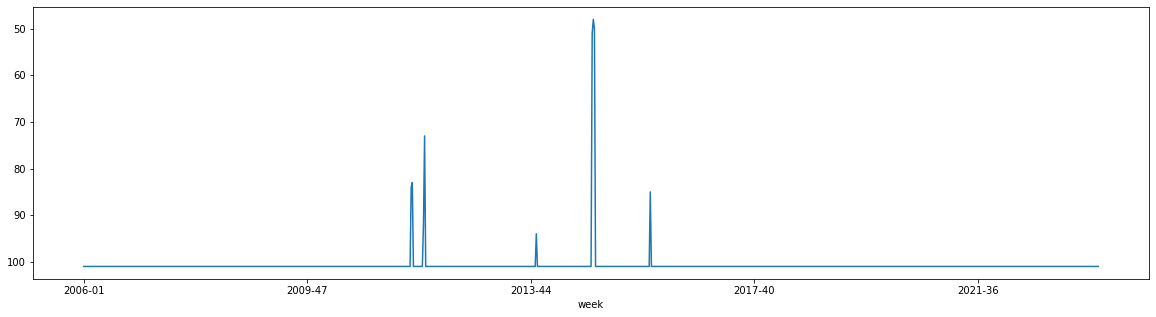

In [38]:
cesta_pisne(['Desatero'])

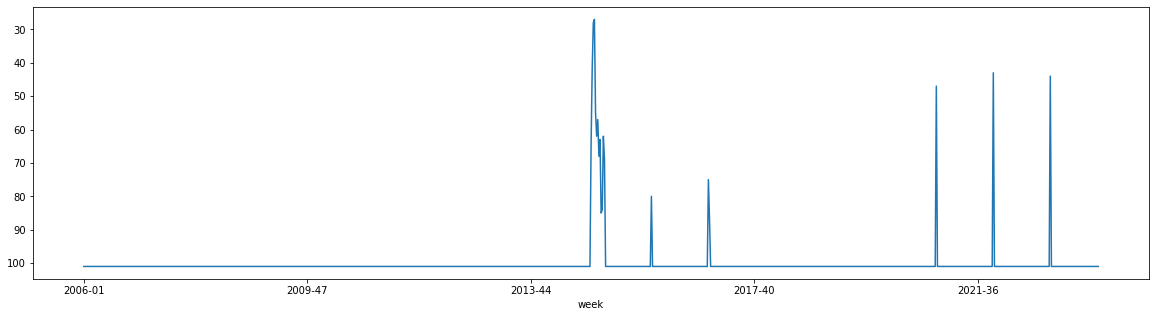

In [39]:
cesta_pisne(['Sněhulák'])

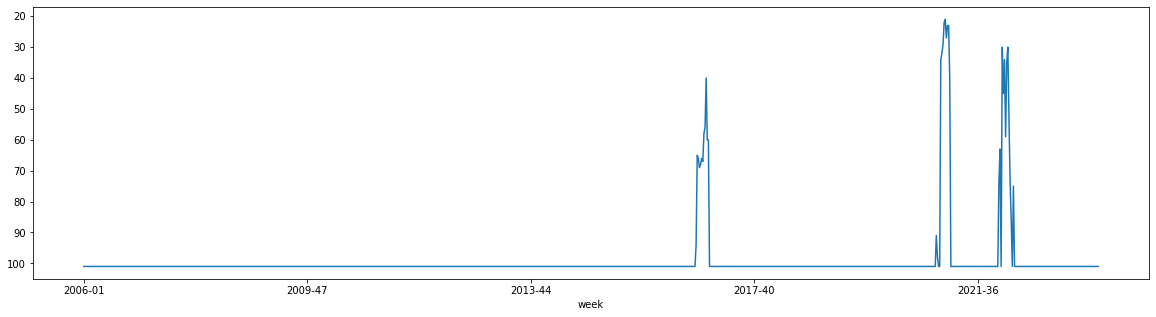

In [40]:
cesta_pisne(['Pouta'])

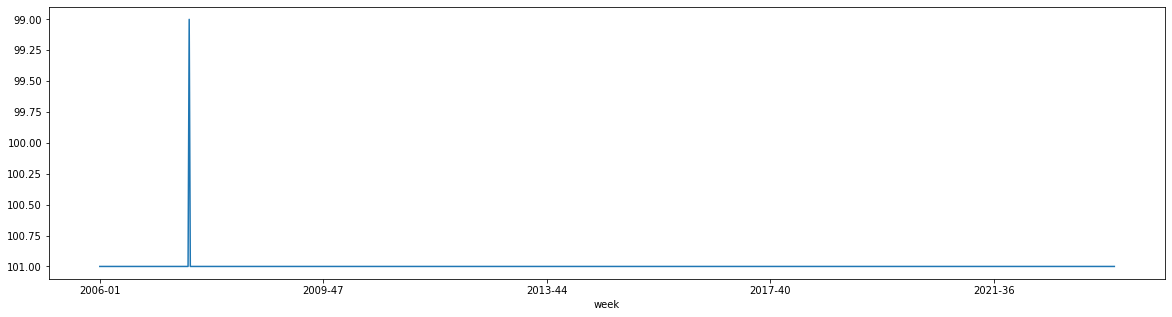

In [41]:
cesta_pisne(['Occhi'])

## Rok 2017

In [62]:
df[df['rok'] == 2017].groupby('track')['week'].nunique().nlargest()

track
Shape of You                49
Když nemůžeš, tak přidej    47
Pro Emu                     46
Sofia                       46
Would I Lie To You          46
Name: week, dtype: int64

In [67]:
df[(df['rok'] == 2017) & (df['track'].str.lower().str.contains('váno',na=False))].groupby('track')['week'].nunique().nlargest()

track
Vánoce na míru    4
Vánoční           3
Name: week, dtype: int64

## Kdy nás ty tracky oblažily poprvé

In [42]:
df[df['track'].isin(vanocni)].groupby(['interpret','track'])['rok'].min().nsmallest(50)

interpret                          track                          
Wham!                              Last Christmas                     2008
Walda Gang                         Vánoční svařák                     2009
Coldplay                           Christmas Lights                   2010
Lucie Vondráčková                  Vánoční strom                      2010
Train                              Shake Up Christmas                 2010
Billy Mack                         Christmas Is All Around            2011
Mariah Carey                       All I Want For Christmas Is You    2011
Lucie Vondráčková Feat. R. Schwab  Vánoční přání                      2011
Václav Neckář & Umakart            Půlnoční                           2011
Lucie                              Medvídek                           2011
Janek Ledecký                      Sliby se maj plnit o Vánocích      2011
No Name                            Biela krása                        2012
Lucie Vondráčková & Kolář Petr   

## Český rozhlas

In [43]:
cro = pd.read_json(os.path.join("data","cro_raw.json"))

In [44]:
cro['since'] = pd.to_datetime(cro['since'].apply(lambda x: x.replace("02:00","01:00")))

In [45]:
vanocni2 = [x.lower().split("(")[0] for x in vanocni]

In [46]:
cro.head()

,since,id,interpret,interpret_id,track,track_id,stanice
0,2020-12-01 04:42:44+01:00,10236811,"Samuel Ramey & London Philharmonic Orchestra, ...",24978,"Non piu andrai, árie z 1. dějství opery Figaro",83837,d
1,2020-12-08 18:25:47+01:00,10270691,"Samuel Ramey & London Philharmonic Orchestra, ...",24978,"Non piu andrai, árie z 1. dějství opery Figaro",83837,d
2,2020-12-09 06:24:52+01:00,10272302,"Samuel Ramey & London Philharmonic Orchestra, ...",24978,"Non piu andrai, árie z 1. dějství opery Figaro",83837,d
3,2020-12-10 18:05:36+01:00,10279719,Adam Plachetka & Symfonický Orchestr Českého R...,24977,"La calunnia e un venticello, árie z 1. dějství...",83835,d
4,2020-12-11 06:04:38+01:00,10281201,Adam Plachetka & Symfonický Orchestr Českého R...,24977,"La calunnia e un venticello, árie z 1. dějství...",83835,d


In [47]:
cro['track'] = cro['track'].apply(lambda x: x.lower().split("(")[0])

In [48]:
cro['datum'] = cro['since'].apply(lambda x: f"""{x.month:02}-{x.day:02}""")

In [49]:
vanocnidata = cro[cro['since'].dt.month >= 11]['datum'].sort_values().drop_duplicates().to_list()[23:]

In [50]:
vanocenacro = pd.Series(cro[(cro['track'].isin(vanocni2)) & (cro['since'].dt.year.isin([2021,2022])) & (cro['since'].dt.month > 9)].groupby('datum')['id'].nunique().reindex(vanocnidata).fillna(0), name="denní přehrání")

In [51]:
len(vanocni2)

55

In [52]:
graf(sloupcovy=[vanocenacro], target="vanoce_cro", titulek='Vánoční hity ve vysílání Českého rozhlasu', podtitulek=f'''Denní počty přehrání 55 vánočních skladeb, které od roku 2006 pronikly do týdenních žebříčků top 100 rádiových písní. Data z let 2021 a 2022.''', kredity=["Zdroj dat: IFPI a Český rozhlas | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, skrytnuly=True)

Graf uložen.


In [53]:
cro[((cro['track'].str.lower().str.contains('vánoc',na=False)) | (cro['track'].str.lower().str.contains('christm',na=False))) & (cro['since'].dt.year.isin([2021,2022])) & (cro['since'].dt.month > 9)].groupby('datum')['id'].nunique().reindex(vanocnidata).fillna(0)

datum
11-24     1.0
11-25     1.0
11-26     0.0
11-27     0.0
11-28     9.0
11-29    13.0
11-30    15.0
12-01    14.0
12-02    10.0
12-03     9.0
12-04     7.0
12-05    29.0
12-06    34.0
12-07    34.0
12-08    32.0
12-09    32.0
12-10    23.0
12-11    14.0
12-12    43.0
12-13    64.0
12-14    42.0
12-15    44.0
12-16    15.0
12-17    14.0
12-18    14.0
12-19    14.0
12-20    78.0
12-21    75.0
12-22    74.0
12-23    70.0
12-24    69.0
12-25    65.0
12-26    59.0
12-27     0.0
12-28     2.0
12-29     2.0
12-30     2.0
12-31     0.0
Name: id, dtype: float64

In [54]:
cro[((cro['track'].str.lower().str.contains('kdepak ty',na=False))) & (cro['since'].dt.year.isin([2021,2022])) & (cro['since'].dt.month > 1)].groupby('datum')['id'].nunique()

datum
02-02    1
02-16    1
06-03    1
06-09    2
06-10    1
06-25    1
07-20    1
09-22    1
09-26    1
09-28    1
09-29    1
10-01    1
10-15    1
11-01    1
12-02    1
12-05    1
12-07    1
12-12    1
12-14    1
12-15    1
12-16    1
12-20    1
12-21    1
12-22    1
12-24    1
12-27    1
Name: id, dtype: int64

In [55]:
cro[cro['track'].str.lower().str.contains('kdepak ty',na=False)].tail(5)

,since,id,interpret,interpret_id,track,track_id,stanice,datum
396429,2021-09-29 15:24:04+01:00,11693467,KAREL GOTT,3502,kdepak ty ptáčku hnízdo máš,13828,pohoda,09-29
397106,2021-10-01 07:11:28+01:00,11705949,KAREL GOTT,3502,kdepak ty ptáčku hnízdo máš,13828,pohoda,10-01
398921,2021-10-15 09:19:18+01:00,11823701,KAREL GOTT,3502,kdepak ty ptáčku hnízdo máš,13828,pohoda,10-15
509338,2020-12-21 10:46:05+01:00,10324924,KAREL GOTT,3502,kdepak ty ptáčku hnízdo máš,13828,radiowave,12-21
526665,2021-02-16 20:56:59+01:00,10576371,KAREL GOTT,3502,kdepak ty ptáčku hnízdo máš,13828,radiowave,02-16


In [56]:
cro[cro['track'].isin(vanocni2) & (cro['since'].dt.year == 2023) & (cro['since'].dt.month <= 10)].sort_values(by='datum').tail(20)

,since,id,interpret,interpret_id,track,track_id,stanice,datum
91500,2023-01-24 00:15:45+01:00,16911782,WHAM/GEORGE MICHAEL,4042,last christmas,39260,dvojka,01-24
328150,2023-02-14 09:39:00+01:00,17110288,NIR FELDER,8076,lover,23867,jazz,02-14
331702,2023-02-28 18:40:30+01:00,17246452,MAHAGON,246,půlnoční,252,jazz,02-28
333485,2023-03-08 01:37:09+01:00,17312918,MAHAGON,246,půlnoční,252,jazz,03-08
348913,2023-05-09 02:52:35+01:00,17774131,MAHAGON,246,půlnoční,252,jazz,05-09
784190,2023-06-07 03:58:53+01:00,18042800,KVĚTY,2004,medvídek,10708,radiowave,06-07
356544,2023-06-08 20:46:51+01:00,18054875,MAHAGON,246,půlnoční,252,jazz,06-08
362238,2023-07-01 18:32:25+01:00,18232457,MAHAGON,246,půlnoční,252,jazz,07-01
364922,2023-07-12 10:43:57+01:00,18367500,MAHAGON,246,půlnoční,252,jazz,07-12
366507,2023-07-18 18:20:48+01:00,18451677,MAHAGON,246,půlnoční,252,jazz,07-18


In [57]:
letni_tracky = cro[cro['since'].dt.month.isin([5,6,7,8])]['track'].drop_duplicates().to_list()

In [58]:
cro[(cro['since'].dt.month == 12)].groupby('track')['id'].nunique().nlargest(60)

track
                                   131
vánoční                            124
all i want for christmas is you     85
crazy                               84
česká státní hymna                  83
půlnoční                            79
last christmas                      78
bílý den                            75
vánoce na míru                      72
imagine                             71
fotky z výletu                      68
whatever it takes                   64
torn                                63
thank god it's christmas            60
merry christmas                     59
farmářům                            58
i přes to všechno                   58
vzácnej den                         58
christmas time                      57
easy on me                          57
black and white                     56
medvídek                            56
na malou chvíli                     56
ryba rybě                           56
vianočná                            56
before you go      

In [59]:
cro[(cro['since'].dt.month == 12) & (~cro['track'].isin(letni_tracky))].groupby('track')['id'].nunique().nlargest(60)

track
vánoční                                      124
all i want for christmas is you               85
vánoce na míru                                72
thank god it's christmas                      60
merry christmas                               59
vzácnej den                                   58
christmas time                                57
ryba rybě                                     56
vianočná                                      56
driving home for christmas                    54
na nebi svítí                                 54
sněhulák                                      52
do they know it's christmas                   48
merry christmas everyone                      44
bílý kraj                                     39
o vánocích                                    39
happy xmas                                    38
prokřehlá - vánoční                           38
so tell me…                                   38
bra3 - vánoční                                37
happy xmas    

## Versus stream

In [73]:
stream = pd.read_csv(os.path.join("data","CZ_SINGLES_DIGITAL_TOP_100_tydenni.csv"))

In [74]:
stream['track_hezky'] = stream.apply(lambda row: f"""{row['interpret_hlavni']}: {row['track'].split("(")[0]}""", axis=1)

In [75]:
letnistream = stream[stream['tyden'].isin([x for x in range(13,42)])]['track'].drop_duplicates().to_list()

In [76]:
vanocnistream = stream[(stream['tyden'].isin([49,50,51,52,53]) & (~stream['track'].isin(letnistream)))].groupby(['track'])['rok'].nunique().nlargest(50)
vanocnistream = vanocnistream[vanocnistream >= 2]
vanocnistream

track
All I Want For Christmas Is You                9
It's Beginning To Look A Lot Like Christmas    9
Last Christmas                                 9
Let It Snow! Let It Snow! Let It Snow!         8
Santa Tell Me                                  8
Happy Xmas (War Is Over)                       7
Christmas Lights                               6
Holly Jolly Christmas                          6
It's the Most Wonderful Time of the Year       6
Jingle Bell Rock                               6
Mistletoe                                      6
Půlnoční                                       6
Rockin' Around The Christmas Tree              6
Vánoce na míru                                 6
Underneath the Tree                            5
Vánoční                                        5
Have Yourself A Merry Little Christmas         4
Merry Christmas Everyone                       4
Ryba rybě                                      4
Sleigh Ride                                    4
Wonderful Chri

<Axes: xlabel='tyden'>

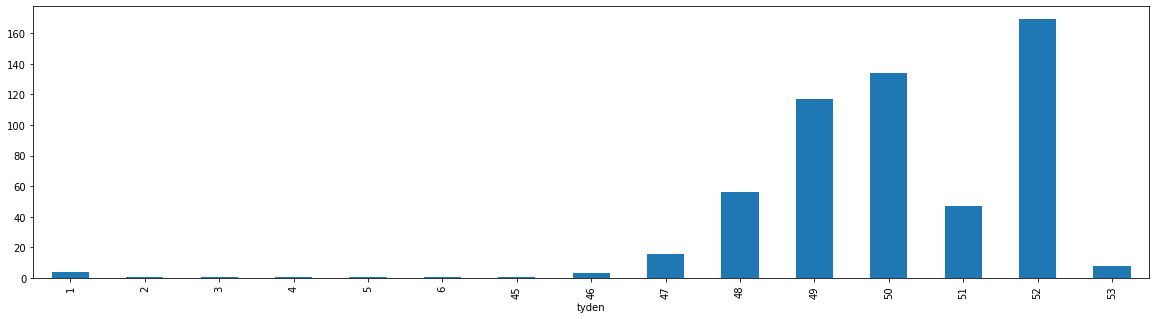

In [83]:
stream[stream['track'].isin(vanocnistream.index.to_list())].groupby('tyden').size().plot.bar(figsize=(20,5))

In [91]:
len(vanocnistream.index.to_list())

37

In [90]:
stream[(stream['track'].isin(vanocnistream.index.to_list())) & (stream['tyden'] > 45)].groupby('track_hezky')['rok'].nunique().nlargest(50)

track_hezky
Wham!: Last Christmas                                         9
Mariah Carey: All I Want For Christmas Is You                 9
Michael Bublé: It's Beginning To Look A Lot Like Christmas    9
Ariana Grande: Santa Tell Me                                  8
Frank Sinatra: Let It Snow! Let It Snow! Let It Snow!         8
John Lennon: Happy Xmas                                       7
Justin Bieber: Mistletoe                                      6
Michael Bublé: Holly Jolly Christmas                          6
Ewa Farna: Vánoce na míru                                     6
Andy Williams: It's the Most Wonderful Time of the Year       6
Brenda Lee: Rockin' Around The Christmas Tree                 6
Václav Neckář: Půlnoční                                       6
Coldplay: Christmas Lights                                    6
Dean Martin: Let It Snow! Let It Snow! Let It Snow!           5
Bobby Helms: Jingle Bell Rock                                 5
Kelly Clarkson: Underneath t